# Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load data

In [3]:
dir = 'data' 

In [4]:
data_list = os.listdir(dir)
data_list

['test.csv', 'train.csv']

In [5]:
datasets = {}
for split in data_list:
    datasets[split] = pd.read_csv(os.path.join(dir, split))

In [6]:
train = datasets["train.csv"]
test = datasets["test.csv"]

In [7]:
train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test[:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA

## Overall

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Statistic

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Column name checking 

In [11]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
numeric_cols = train.select_dtypes(include=np.number)

In [13]:
non_numeric = train.select_dtypes(exclude=np.number)

In [14]:
type(train)

pandas.core.frame.DataFrame

In [15]:
train["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Data distribution 
### (Continuous Variables)

In [16]:
numeric_cols.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

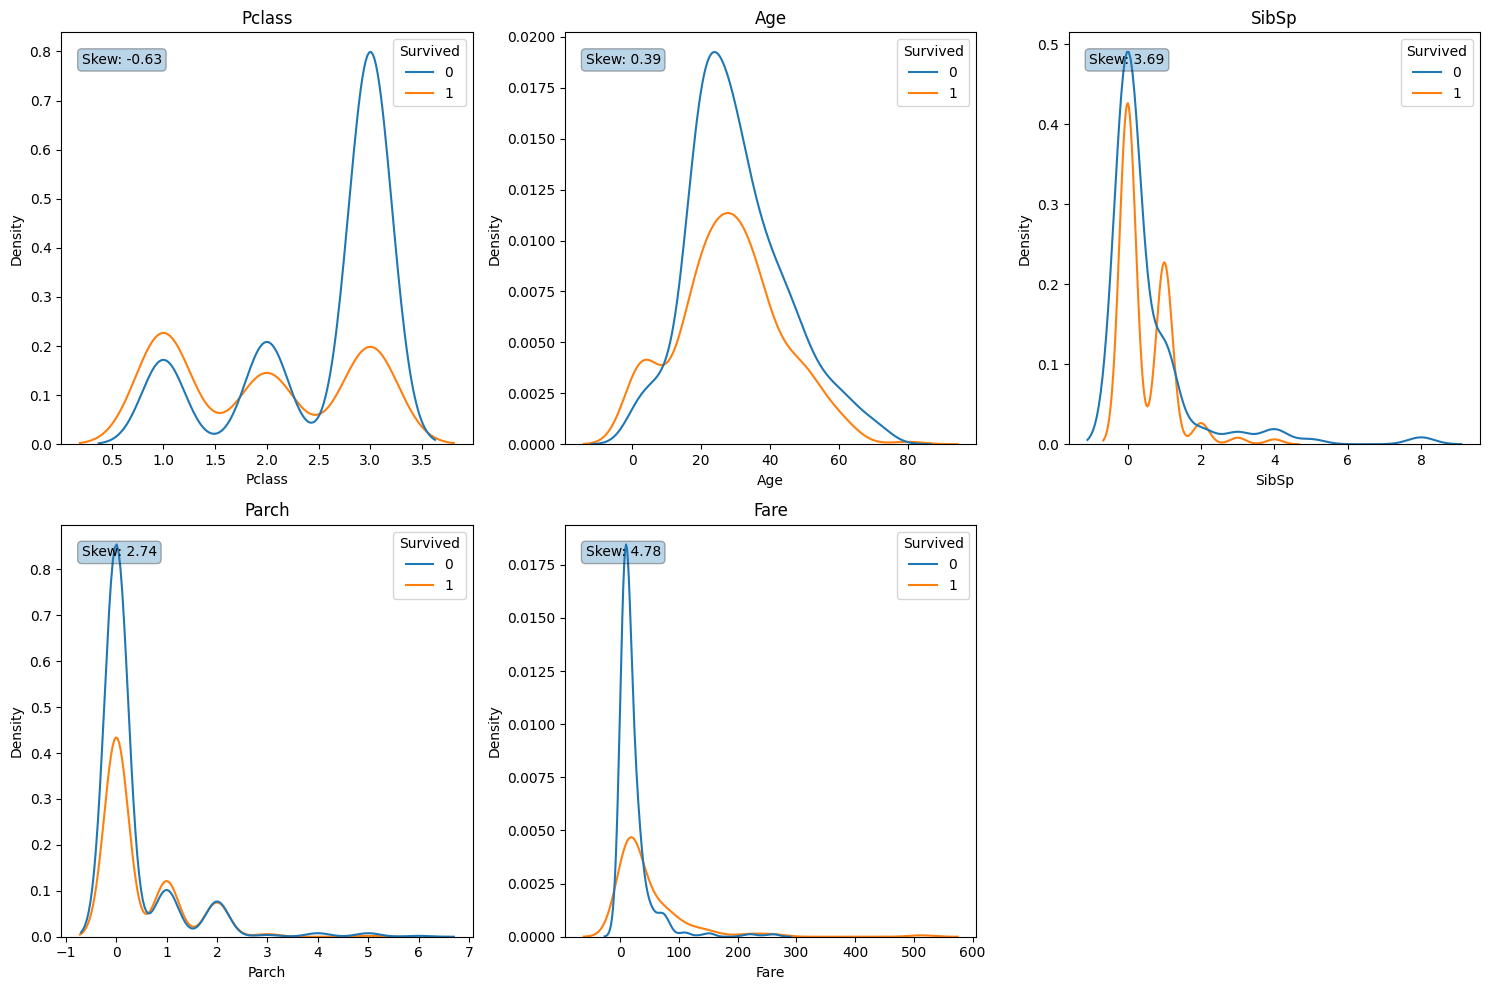

In [17]:
from scipy.stats import skew

distribute_col = numeric_cols.columns.drop(["PassengerId", "Survived"])

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
index = 0

for col in distribute_col:
    sns.kdeplot(
        data=train,
        x=col,
        hue="Survived",
        ax=ax.flat[index],
        warn_singular=False
    )

    # Tính skewness (bỏ NaN)
    col_skew = skew(train[col].dropna())

    # Hiển thị skewness lên plot
    ax.flat[index].text(
        0.05, 0.95,
        f"Skew: {col_skew:.2f}",
        transform=ax.flat[index].transAxes,
        fontsize=10,
        verticalalignment="top",
        bbox=dict(boxstyle="round", alpha=0.3)
    )

    ax.flat[index].set_title(col)
    index += 1

ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

fig.savefig("diagrams/continous_data_distribution.png")

Comments
- **Pclass:** 1st tend to have 0.15 rate of surival, while 2nd and 3rd is deadlier.
- **Age:** Older people have higher survivability than young generation, but pay attention to survival rate at shape, it is not a perfect bell-curves one, you can see it fluctuate at between the age of 0 and 20, telling that the rescue boats prioritied children to go on board.
- **Fare:** As i can see, lower fare has higher rate of dying.


### (Discrete Variables)

In [18]:
non_numeric.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

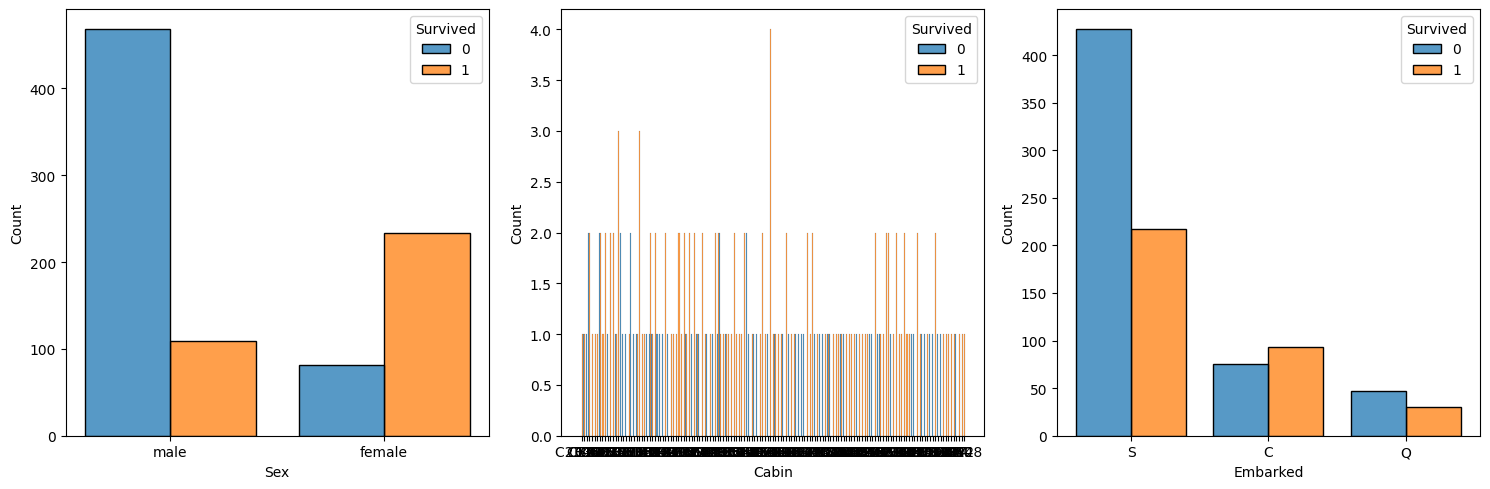

In [19]:
discrete_columns = non_numeric.drop(columns=["Name", "Ticket"])

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
index = 0

for col in discrete_columns:
    sns.histplot(
        data=train,
        x=col,
        hue="Survived",
        ax=ax.flat[index],
        multiple="dodge",
        shrink=0.8
    )
    index += 1
plt.tight_layout()
plt.show()
fig.savefig('diagrams/discrete_data_distribution.png')

Comment: 
- **Sex:** female has higher survival rate compare to male (0.205 > 0.691)
- **Embarked:** people who embarked from C tend to have higher survival rate though 

## Duplicate checking

In [20]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
train.shape

(891, 12)

In [22]:
train["PassengerId"].nunique()

891

## Check missing value

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age and Cabin is missing values, about 80.13% and 22.89% perspectively

# Feature Engineer

## Handling missing values

Based on above analytic results we concluded that: Age and Cabin is missing values, about 80.13% and 22.89% perspectively

### Little's test 

In [24]:
mcar_columns = numeric_cols.columns.drop(["PassengerId"])

In [25]:
mcar_columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [26]:
mcar_dataset = train[mcar_columns]

In [27]:
mcar_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [28]:
from pyampute.exploration.mcar_statistical_tests import MCARTest
import pandas as pd

mt = MCARTest(method="little")
p_value = mt.little_mcar_test(mcar_dataset)

print("p-value:", p_value)

p-value: 9.692329161481439e-09


=> It's not MCAR, so there're 2 technique to solve this missing value pattern that is filling it mean, mode based on skewness or KNN impute. Due to this simplicity, i'll choose filling the missing value mean, mode based on its data distribution.

![](diagrams/continous_data_distribution.png)

Based on the Age's distribution diagram, the skewness > 0 so i'll fill mode into missing values.

In [29]:
mode_age = train["Age"].mode()[0]
mode_fare = train["Fare"].mode()[0]

In [30]:
train["Age"].fillna(mode_age, inplace=True)

test["Age"].fillna(mode_age, inplace=True)
test["Fare"].fillna(mode_fare, inplace=True)

C:\Users\NewDat\AppData\Local\Temp\ipykernel_25304\2013546248.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(mode_age, inplace=True)
C:\Users\NewDat\AppData\Local\Temp\ipykernel_25304\2013546248.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

discrete_values latter will be get_dummies

## Feature correlation

### Multicollinear

#### Continuos columns

In [31]:
numeric_corr = train[numeric_cols.columns.drop(["PassengerId", "Survived"])].corr()

In [32]:
numeric_corr

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.356187,0.083081,0.018443,-0.549500
Age,-0.356187,1.000000,-0.232411,-0.155118,0.107554
SibSp,0.083081,-0.232411,1.000000,0.414838,0.159651
Parch,0.018443,-0.155118,0.414838,1.000000,0.216225
Fare,-0.549500,0.107554,0.159651,0.216225,1.000000


<Axes: >

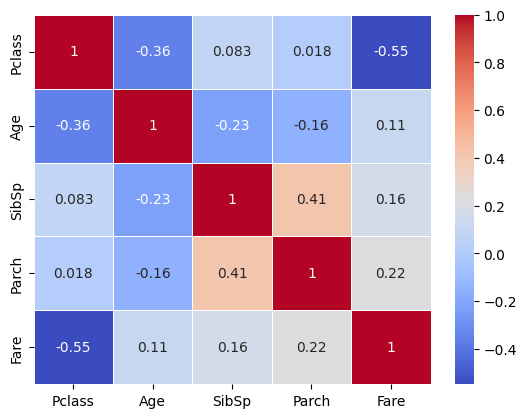

In [33]:
sns.heatmap(numeric_corr, annot=True, cmap="coolwarm", linewidths=0.5)

No need to drop any columns

#### Discrete columns

In [34]:
numeric_corr = train[non_numeric.columns.drop(["Name", "Ticket"])].fillna("Unknown")

In [35]:
numeric_corr

,Sex,Cabin,Embarked
0,male,Unknown,S
1,female,C85,C
2,female,Unknown,S
3,female,C123,S
4,male,Unknown,S
...,...,...,...
886,male,Unknown,S
887,female,B42,S
888,female,Unknown,S
889,male,C148,C


In [36]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency


def cramers_v(x: pd.Series, y: pd.Series) -> float:
    """
    Compute Cramér's V for two categorical variables.
    Assumes NO missing values.
    """
    contingency = pd.crosstab(x, y)

    if contingency.shape[0] <= 1 or contingency.shape[1] <= 1:
        return 0.0

    chi2, _, _, _ = chi2_contingency(contingency)
    n = contingency.to_numpy().sum()
    r, k = contingency.shape

    return np.sqrt(chi2 / (n * (min(r - 1, k - 1))))

def cramers_v_matrix(df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute Cramér's V matrix for a DataFrame of categorical variables.
    Assumes df is already cleaned and contains only categorical columns.
    """
    cols = df.columns
    n = len(cols)

    matrix = pd.DataFrame(
        np.zeros((n, n)),
        index=cols,
        columns=cols
    )

    for i, col1 in enumerate(cols):
        for j, col2 in enumerate(cols):
            if i <= j:
                v = cramers_v(df[col1], df[col2])
                matrix.loc[col1, col2] = v
                matrix.loc[col2, col1] = v

    return matrix

In [37]:
discrete_matrix = cramers_v_matrix(numeric_corr)

In [38]:
discrete_matrix

,Sex,Cabin,Embarked
Sex,0.997541,0.452045,0.138185
Cabin,0.452045,1.000000,0.690328
Embarked,0.138185,0.690328,1.000000


<Axes: >

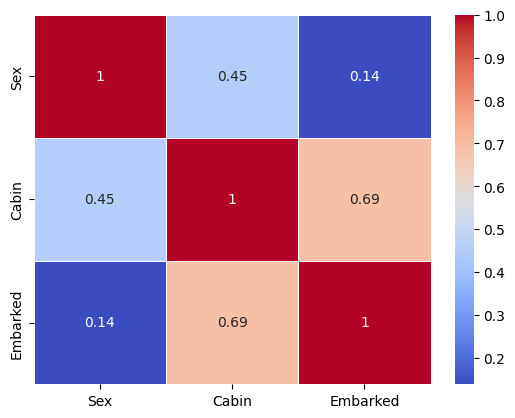

In [39]:
sns.heatmap(discrete_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

No need to drop any columns

## Feature importance 

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

label_col = "Survived"
df_fi = train.copy()

exclude_cols = [label_col]
feature_cols = [c for c in df_fi.columns if c not in exclude_cols]

X_fi = df_fi[feature_cols]
y_fi = df_fi[label_col]

# Drop các cột không dùng
X_fi = X_fi.drop(columns=['PassengerId', 'Ticket', 'Name'])

# 🔹 BƯỚC MỚI: chuyển object → category
obj_cols = X_fi.select_dtypes(include="object").columns
X_fi[obj_cols] = X_fi[obj_cols].astype("category")

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_fi,
    y_fi,
    test_size=0.2,
    stratify=y_fi,
    random_state=42
)

In [41]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
692,3,male,24.0,0,0,56.4958,NaN,S
481,2,male,24.0,0,0,0.0000,NaN,S
527,1,male,24.0,0,0,221.7792,C95,S
855,3,female,18.0,0,1,9.3500,NaN,S
801,2,female,31.0,1,1,26.2500,NaN,S
...,...,...,...,...,...,...,...,...
359,3,female,24.0,0,0,7.8792,NaN,Q
258,1,female,35.0,0,0,512.3292,NaN,C
736,3,female,48.0,1,3,34.3750,NaN,S
462,1,male,47.0,0,0,38.5000,E63,S


Accuracy: 0.8044692737430168
Sex         0.363339
Pclass      0.161199
Cabin       0.104747
SibSp       0.087729
Fare        0.076960
Age         0.073194
Embarked    0.068161
Parch       0.064671
dtype: float32


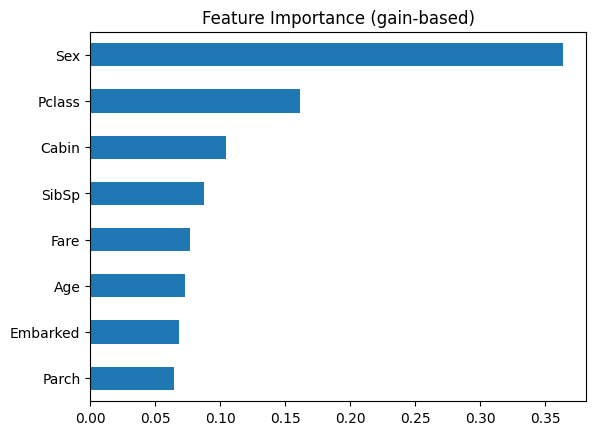

In [42]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(
    n_estimators=1000,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    enable_categorical=True
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

importances = model.feature_importances_

feat_imp = pd.Series(importances, index=X_train.columns)
feat_imp = feat_imp.sort_values(ascending=False)

print(feat_imp.head(10))

feat_imp.head(15).plot(kind='barh')
plt.title("Feature Importance (gain-based)")
plt.gca().invert_yaxis()
plt.show()

## Imbalance checking 

In [43]:
label_1 = train['Survived'].value_counts()[1]/(train['Survived'].value_counts()[0] + train['Survived'].value_counts()[1])*100
label_0 = train['Survived'].value_counts()[0]/(train['Survived'].value_counts()[0] + train['Survived'].value_counts()[1])*100

In [44]:
print(f"Percentage of label 1: {label_1:.2f}%")
print(f"Percentage of label 0: {label_0:.2f}%")

Percentage of label 1: 38.38%
Percentage of label 0: 61.62%


1 : 1,16 => Not that bad, right?

## Encode discrete

In [45]:
train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
categorical_columns=["Pclass", "Sex", "Embarked", "Cabin", "SibSp", "Parch", ]
continuous_columns=["Age", "Fare"]
target_col = "Survived"

In [47]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False
)

X_train_cat = ohe.fit_transform(train[categorical_columns])
X_train_cat = pd.DataFrame(X_train_cat, columns=ohe.get_feature_names_out(categorical_columns))

X_test_cat  = ohe.transform(test[categorical_columns])
X_test_cat = pd.DataFrame(X_test_cat, columns=ohe.get_feature_names_out(categorical_columns))

## Standardize

In [48]:
X_train_cont = train[continuous_columns]
X_test_cont  = test[continuous_columns]

In [49]:
continuous_columns

['Age', 'Fare']

In [50]:
X_train_cont.shape

(891, 2)

In [51]:
# Standardize continuous features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_cont = scaler.fit_transform(X_train_cont)
X_train_cont = pd.DataFrame(X_train_cont, columns=scaler.get_feature_names_out(continuous_columns))

X_test_cont = scaler.transform(X_test_cont)
X_test_cont = pd.DataFrame(X_test_cont, columns=scaler.get_feature_names_out(continuous_columns))

In [52]:
upper = X_train_cont['Fare'].quantile(0.99)

X_train_cont['Fare'] = X_train_cont['Fare'].clip(upper=upper)
X_test_cont['Fare']  = X_test_cont['Fare'].clip(upper=upper)

In [53]:
df_encoded_train = pd.concat([X_train_cat, X_train_cont], axis=1)
df_encode_test = pd.concat([X_test_cat, X_test_cont], axis=1)

In [54]:
df_encoded_train.shape

(891, 173)

In [55]:
df_encode_test.shape

(418, 173)

In [56]:
df_encoded_train["Survived"] = train[target_col]

In [57]:
df_encoded_train.shape

(891, 174)

# Model 

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X = df_encoded_train.drop(columns=["Survived"])
y = df_encoded_train["Survived"]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(
        max_iter=5000,
        random_state=42,
        solver="newton-cg",
        tol=1e-6
    ),
    "SVC (RBF)": SVC(
        kernel="rbf",
        C=5,
        gamma="scale",
        probability=True,
        random_state=42
    )
}

try:
    from xgboost import XGBClassifier

    models["XGBoost"] = XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        n_estimators=500,
        learning_rate=0.01,
        max_depth=10,
        min_child_weight=3,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.0,
        reg_lambda=1.0,
        tree_method="hist",
        random_state=42
    )
except ImportError:
    print("XGBoost chưa được cài, bỏ qua model XGBoost trong CV.")

cv_rows = []
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy", n_jobs=-1)
    cv_rows.append({
        "model": name,
        "cv_mean_accuracy": scores.mean(),
        "cv_std": scores.std()
    })

cv_results = pd.DataFrame(cv_rows).sort_values("cv_mean_accuracy", ascending=False)
cv_results

,model,cv_mean_accuracy,cv_std
2,XGBoost,0.838359,0.033508
1,SVC (RBF),0.826018,0.018626
0,LogisticRegression,0.810332,0.023883


In [71]:
# Train best model from CV and save submission
best_model_name = cv_results.iloc[0]["model"]
best_model = models[best_model_name]

best_model.fit(X, y)
best_pred = best_model.predict(df_encode_test)

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": best_pred.astype(int)
})
submission.to_csv("submission.csv", index=False)

print(f"Saved submission.csv using: {best_model_name}")
submission.head()

Saved submission.csv using: XGBoost


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
